In [1]:
import os
import keras
import matplotlib.pyplot as plt
import tensorflow as tf 
from keras.layers import Dense,GlobalAveragePooling2D,Concatenate,Dropout
from keras.applications import MobileNet
from keras.preprocessing import image###
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator###
from keras.models import Model,load_model
from keras.optimizers import Adam
from keras import layers
from keras import models

Using TensorFlow backend.


In [2]:
model = load_model('stage_1_1650jjj.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1728      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
_________________________________________________________________
activation_1 (Activation)    (None, 5)                 0         
Total params: 6,213
Trainable params: 6,213
Non-trainable params: 0
_________________________________________________________________


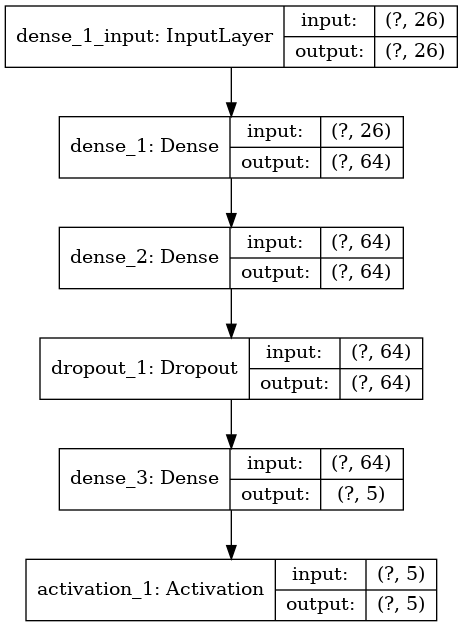

In [3]:
tf.keras.utils.plot_model(model,show_shapes = True  )###

In [4]:
for layer in model.layers:
    layer.trainable=False
    #layer.trainable=True
for i,layer in enumerate(model.layers):
    if layer.trainable==True:
        print(i,layer.name,'Ture')
    else:
        print(i,layer.name,'False')

0 dense_1 False
1 dense_2 False
2 dropout_1 False
3 dense_3 False
4 activation_1 False


In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1728      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
_________________________________________________________________
activation_1 (Activation)    (None, 5)                 0         
Total params: 12,426
Trainable params: 6,213
Non-trainable params: 6,213
_________________________________________________________________


/opt/conda/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


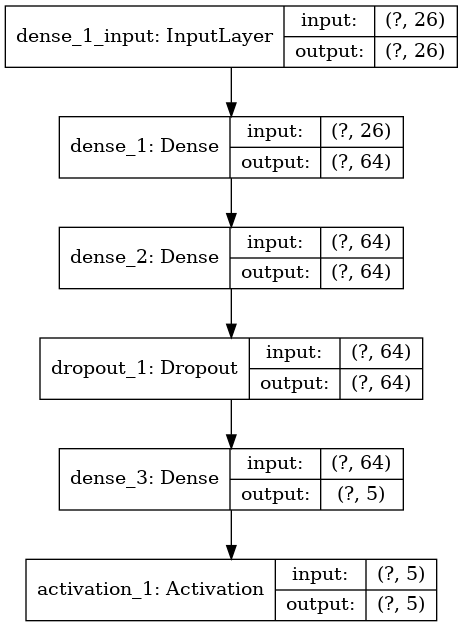

In [6]:
tf.keras.utils.plot_model(model,show_shapes = True  )###

In [7]:
#concin = Concatenate()([model.layers[-1].output])
x=Dense(4,activation='relu')(model.layers[-1].output) 
x=Dense(3,activation='relu')(x) 
x=Dense(3,activation='relu')(x) 
y=Dense(4,activation='relu')(model.layers[-1].output) 
y=Dense(4,activation='relu')(y)
y=Dense(3,activation='relu')(y) 
added = keras.layers.add([x, y])
preds=Dense(3,activation='softmax')(added) 
#model1=Model(inputs=model.input,outputs=preds)

In [8]:
model1=Model(inputs=model.input,outputs=preds)

ValueError: The name "dense_1" is used 2 times in the model. All layer names should be unique.

In [ ]:
model1.summary()

In [ ]:
tf.keras.utils.plot_model(model1,show_shapes = True  )###

In [9]:
x=Dense(64,activation='relu',name="new_dense_one")(model.layers[0].input) 
x=Dense(64,activation='relu',name="new_dense_two")(x) 
x=Dropout(0.2,name="new_dropout")(x) 
x=Dense(5,activation='relu',name="new_dense_three")(x) 
x=Dense(5,activation='relu',name="new_dense_four")(x)
added = keras.layers.add([model.output, x],name="layers_combine")
preds=Dense(5,activation='softmax',name="final_dense")(added) 

In [10]:
modelbouble=Model(inputs=model.input,outputs=preds)

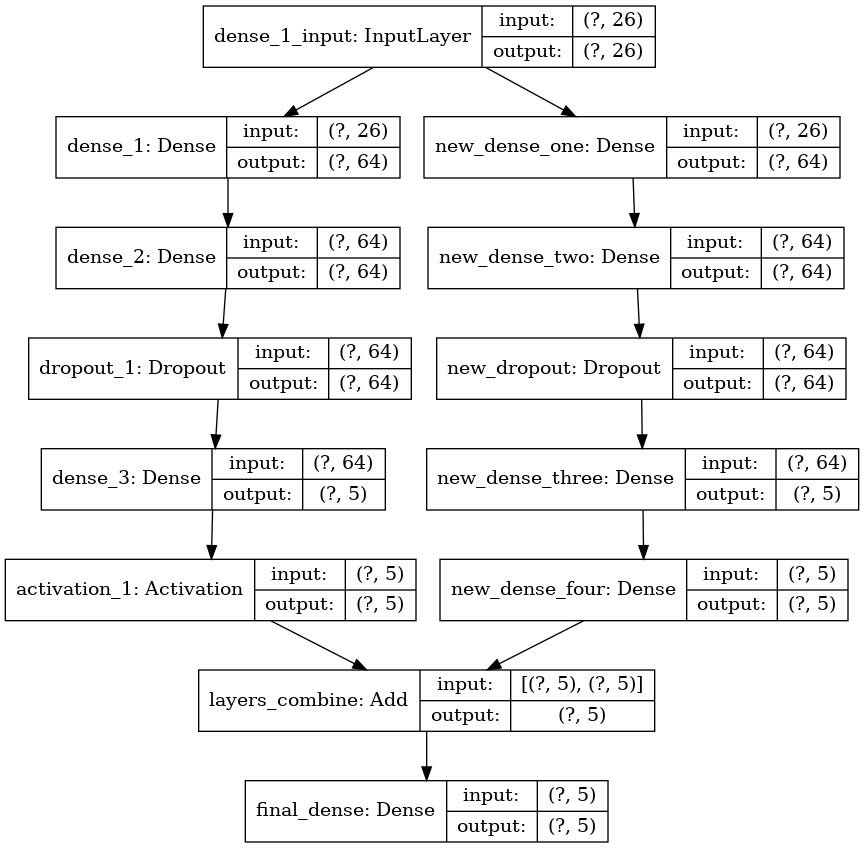

In [11]:
tf.keras.utils.plot_model(modelbouble,show_shapes = True  )###

In [17]:
for i,layer in enumerate(modelbouble.layers):
    if layer.trainable==True:
        print(i,layer.name,'Ture')
    else:
        print(i,layer.name,'False')

0 dense_1_input Ture
1 dense_1 False
2 new_dense_one Ture
3 dense_2 False
4 new_dense_two Ture
5 dropout_1 False
6 new_dropout Ture
7 dense_3 False
8 new_dense_three Ture
9 activation_1 False
10 new_dense_four Ture
11 layers_combine False
12 final_dense Ture


In [18]:
for i,layer in enumerate(modelbouble.layers):
    if i==0 or i==2 or i==4 or i==6 or i==8 or i==10 or i==11 or i ==12 :
        layer.trainable=True
    else:
        layer.trainable=False

In [19]:
modelbouble.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
dense_1_input (InputLayer)      (None, 26)           0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 64)           1728        dense_1_input[0][0]              
__________________________________________________________________________________________________
new_dense_one (Dense)           (None, 64)           1728        dense_1_input[0][0]              
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 64)           4160        dense_1[0][0]                    
____________________________________________________________________________________________